# Part II - FORD GOBIKE DATA VISUALISATION REPORT
## by Jarvis Betty Katana

## Investigation Overview


> The goal of this presentation is to provide a clear and insightful analysis of the bike-sharing dataset, with a focus on understanding user behavior, trip patterns, and the influence of various factors such as user type, gender, and time of day. This investigation will help highlight differences between Subscribers and Customers and reveal how demographic factors and usage patterns can inform improvements in service offerings and targeted marketing strategies.

> **Executive Summary of Key Insights**
  > * User Type and Trip Purpose:Subscribers predominantly use the bike-sharing service for commuting, especially during peak hours, which is reflected in longer trip durations during those times.
In contrast, Customers exhibit greater variability in their trip patterns, with a noticeable increase in trip durations on weekends. This suggests that Customers are more likely to use the service recreationally or spontaneously, particularly on Saturdays.
  > * Influence of Time of Day:Trip durations generally increase in the late afternoon and evening, especially on weekdays. This trend suggests that users take longer trips toward the end of the day, potentially for leisure or errands following their workday. Understanding peak usage times helps in ensuring better bike availability and optimizing service during high-demand periods.
  > * Gender Dynamics in Trip Duration:Gender differences reveal that female users tend to take shorter trips on average than male users, especially on weekdays. This finding may imply that female riders are more likely using the service for shorter, task-based trips, while male riders may engage in longer commutes or recreational rides.
  > * Day of the Week Patterns:A significant increase in average trip durations for Customers on weekends, particularly on Saturdays, points to recreational use. This insight can guide strategies for weekend promotions, event tie-ins, or incentives aimed at leisure riders.
  > * Complex Interactions Between Variables:The interactions among user type, trip duration, start hour, and day of the week reveal nuanced insights. The combination of gender and user type, for instance, provides a deeper understanding of how different demographic groups engage with the service. Recognizing these differences emphasizes the importance of tailoring services to meet the specific needs of diverse user groups.

## Dataset Overview and Executive Summary

> **Data Overview**
>This dataset captures detailed information about individual rides made within the Ford GoBike bike-sharing system, which operates in the greater San Francisco Bay Area. The dataset includes trip and user-specific attributes that provide insights into how different demographics use the service. Key columns are as follows:
> * `duration_sec`: The duration of the bike trip is in seconds.
> * `start_time` and `end_time`: Date and time when the trip started and ended.
> * `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`: Information about the starting station.
> * `end_station_id`, `end_station_name`, `end_station_latitude`, `end_station_longitude`: Information about the ending station.
> * `bike_id`: The unique ID of the bike.
> * `user_type`: Whether the user is a "Customer" or "Subscriber".
> * `member_birth_year`: Year of birth of the member.
> * `member_gender`: Gender of the user.
> * `bike_share_for_all_trip`: Indicates if the trip is part of a bike-share-for-all program.
> Apart from that I made some columns which will be usefull for our analysis:
`start_hour`,`start_day`,`start_date`,`start_month`,`duration_min`

> **Executive Summary**
This analysis offers key insights into bike-sharing usage patterns and user behavior:
> 1. User Type Differences: Subscribers, likely using the service for commuting, show longer trips during peak hours, while Customers exhibit more variability, especially during weekends, indicating more recreational or spontaneous use.
> 2. Time of Day Influence: Trip durations increase in the late afternoon and evening, particularly on weekdays, which points to potential post-work or leisure trips.
> 3. Gender Dynamics: Female users generally take shorter trips than male users, especially on weekdays, suggesting differing trip purposes or usage patterns by gender.
> 4. Weekend Patterns: Customer trip durations increase significantly on weekends, especially Saturdays, underscoring the recreational nature of Customer rides.
> 5. Complex Interactions: Relationships between user type, gender, and time reveal nuanced usage patterns, highlighting opportunities for more tailored services.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('./data/clean_fordgobike_tripdata.csv.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,start_date,start_month,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,17,Thursday,2019-02-28,February,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,18,Thursday,2019-02-28,February,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,12,Thursday,2019-02-28,February,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,17,Thursday,2019-02-28,February,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,23,Thursday,2019-02-28,February,26.416667


## Visualization 1: Trip Duration by Hour, Split by User Type and Gender

> This visualization examines how trip durations vary by hour, segmented by user type (Customer vs. Subscriber) and gender. It provides insights into usage patterns, showing whether Subscribers and Customers have distinct trip durations during specific hours, and highlights any noticeable gender differences within each user type. 

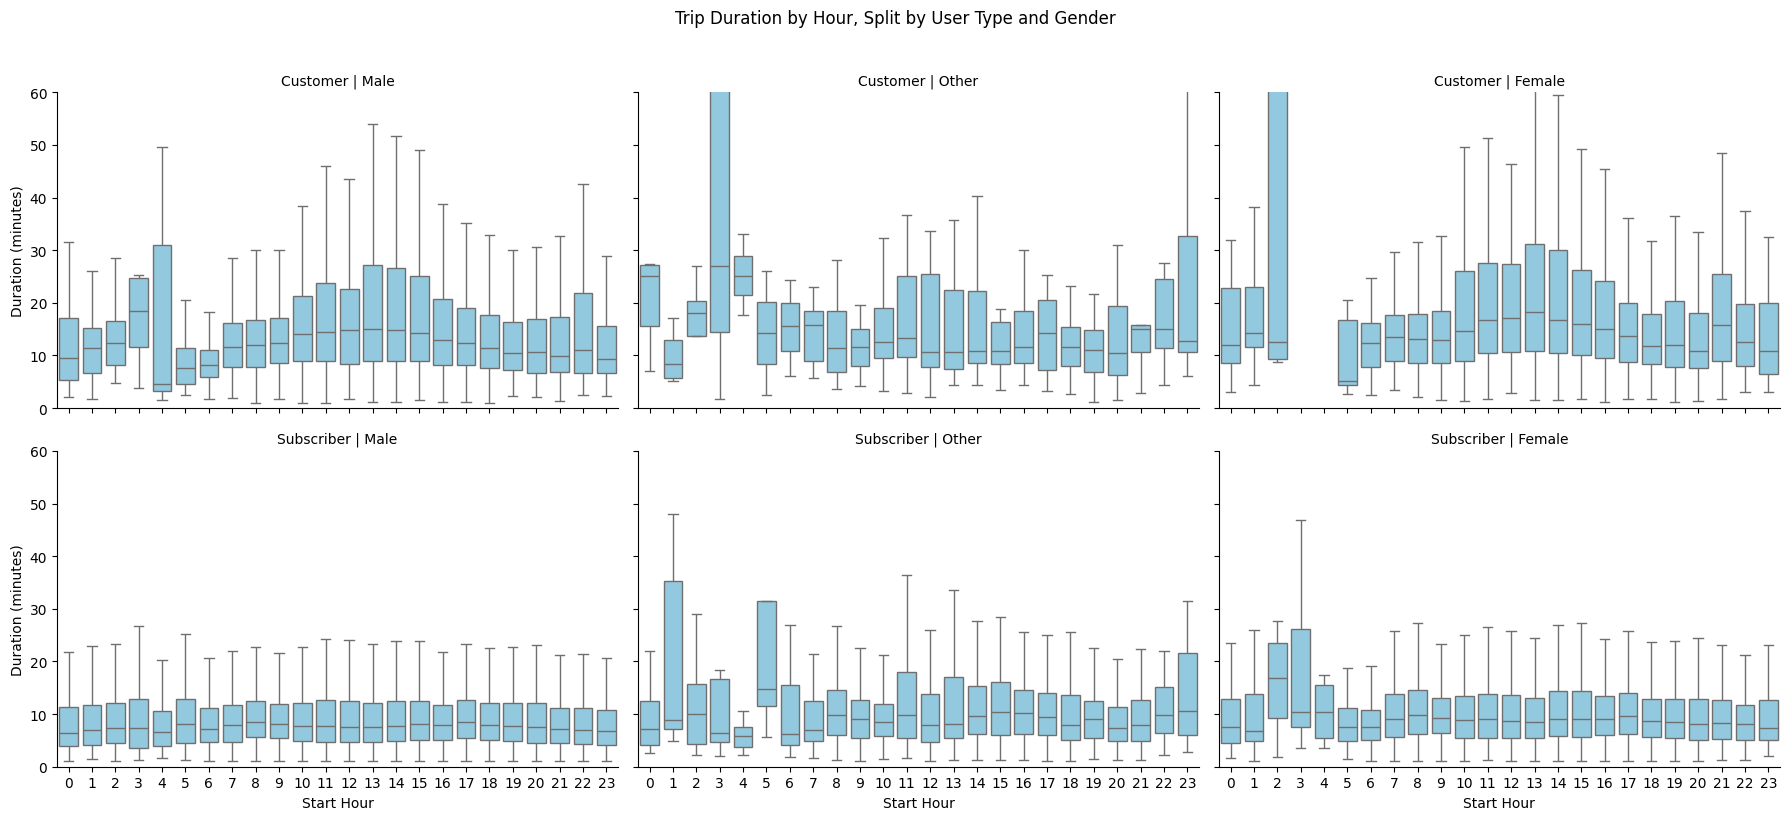

In [3]:
# Set up the FacetGrid for trip duration by hour, split by user type and gender
g = sns.FacetGrid(df, row="user_type", col="member_gender", height=4, aspect=1.5)
g.map(sns.boxplot, "start_hour", "duration_min", showfliers=False, color='skyblue')

# Set titles for each subplot and axis labels
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_axis_labels("Start Hour", "Duration (minutes)")

# Set y-axis limits to focus on trips under 60 minutes for clarity
g.set(ylim=(0, 60))

# Add a main title and adjust layout
g.fig.suptitle("Trip Duration by Hour, Split by User Type and Gender", y=1.02)
plt.tight_layout()

# Show plot
plt.show()

* Subscribers show longer trips during morning (8-9 AM) and evening (5-6 PM) hours, aligning with typical commuting times.
* Customers have greater trip duration variability, especially in the evening and on weekends, likely reflecting recreational use.
* Gender Dynamics: Male users within both user types have slightly longer trip durations, particularly during peak times, than female users

## Visualization 2: Heatmap of Average Trip Duration by Day, Hour, and User Type
> This provides a granular view of trip duration patterns across different hours and days of the week for different user types.

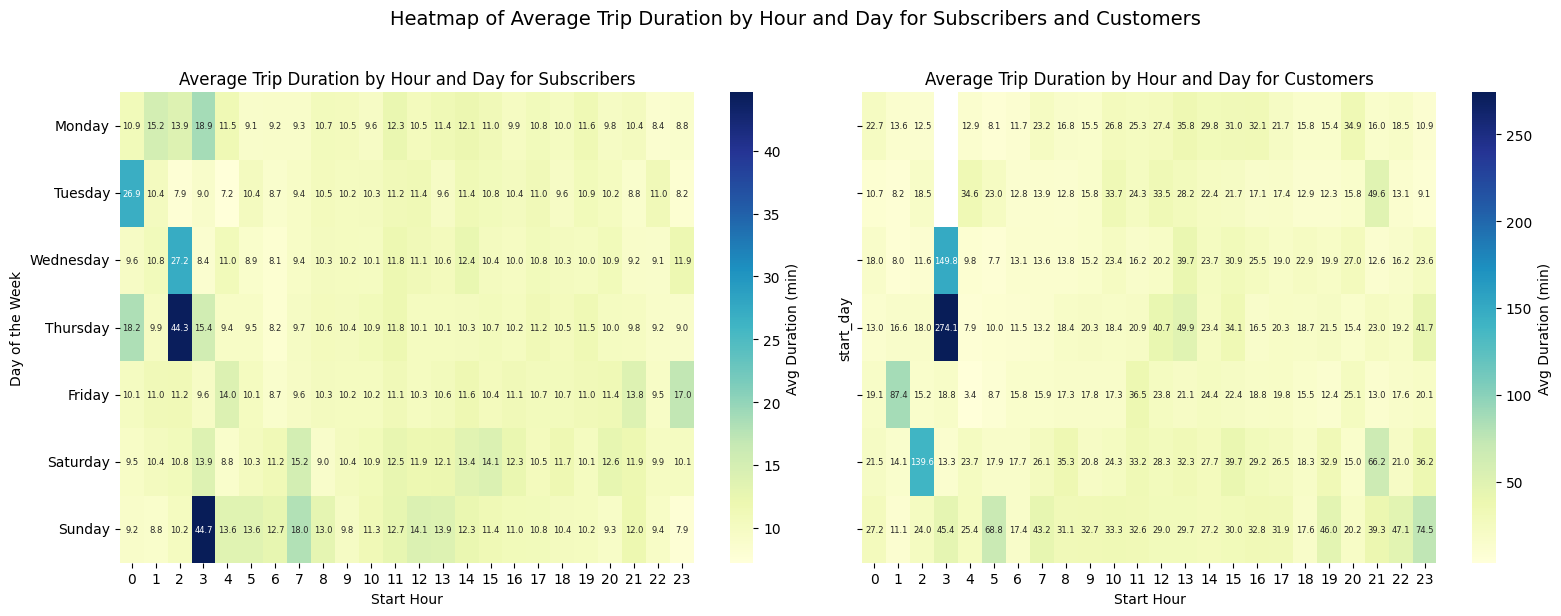

In [12]:
# Prepare pivot tables for heatmaps
subscriber_pivot = df[df['user_type'] == 'Subscriber'].pivot_table(index='start_day', columns='start_hour', values='duration_min', aggfunc='mean').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
customer_pivot = df[df['user_type'] == 'Customer'].pivot_table(index='start_day', columns='start_hour', values='duration_min', aggfunc='mean').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Set up the figure and axes for side-by-side heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot heatmap for Subscribers
sns.heatmap(subscriber_pivot, cmap="YlGnBu", ax=ax1, annot=True, fmt=".1f", cbar_kws={'label': 'Avg Duration (min)'}, annot_kws={"size": 6})
ax1.set_title("Average Trip Duration by Hour and Day for Subscribers", fontsize=12)
ax1.set_xlabel("Start Hour", fontsize=10)
ax1.set_ylabel("Day of the Week", fontsize=10)

# Plot heatmap for Customers
sns.heatmap(customer_pivot, cmap="YlGnBu", ax=ax2, annot=True, fmt=".1f", cbar_kws={'label': 'Avg Duration (min)'}, annot_kws={"size": 6})
ax2.set_title("Average Trip Duration by Hour and Day for Customers", fontsize=12)
ax2.set_xlabel("Start Hour", fontsize=10)

# Add an overall title  and show plot
plt.suptitle("Heatmap of Average Trip Duration by Hour and Day for Subscribers and Customers", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


* Both subscribers and customers exhibit similar patterns on weekdays, with peak usage during commuting hours. 
* Customers show longer trip durations on weekends, particularly in the afternoon, consistent with recreational usage.

## Visualization 3: Distribution of Rides by Day of the Week
> This visualization shows the distribution of rides by day of the week, highlighting the peak usage days and the overall trend in usage patterns.

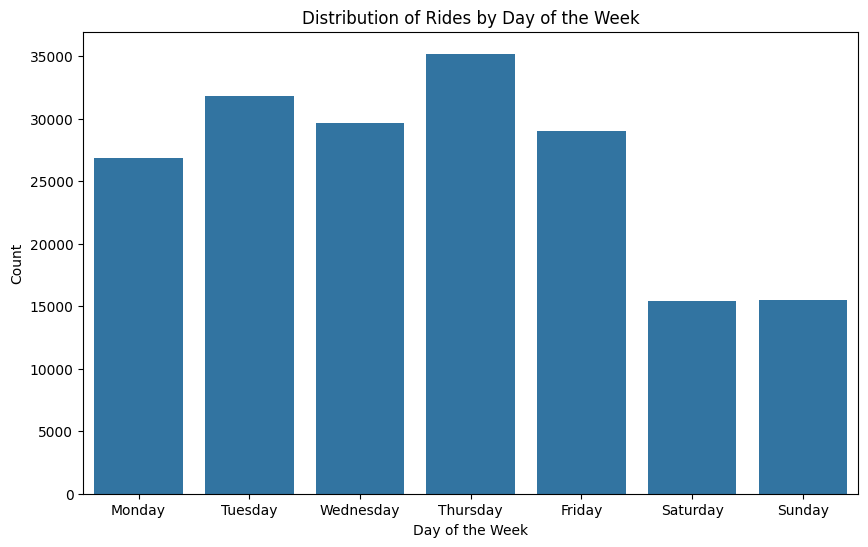

In [14]:
# Plotting distribution of rides by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='start_day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Distribution of Rides by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

* Peak Usage Days: Thursday has the highest number of rides, followed closely by Tuesday.
* Weekend Usage: While Thursday and Tuesday are the peak days, the usage on weekends (Saturday and Sunday) is significantly lower.
* Weekday Pattern: There's a general trend of higher usage on weekdays compared to weekends. 

### Conclusion
> Based on the three visualizations, we can draw the following conclusions about bike-sharing usage patterns:
> * User Type Differences: **Subscribers**: Tend to have longer trips, especially during peak commuting hours. Their usage patterns suggest a strong reliance on the service for daily commutes.
**Customers**: Exhibit more variability in trip duration. They often take shorter trips, but may also engage in longer recreational rides, especially during weekends.
Time of Day Influence:
> * Peak Usage: Trip durations are significantly higher during peak hours, particularly in the morning and evening, suggesting that the service is heavily used for commuting.
Weekend Patterns: Weekends show a different pattern, with longer trips and more variability, indicating increased recreational use.
> * Day of the Week: Weekday Usage: Weekdays, especially Thursdays and Tuesdays, see the highest usage, likely due to work commutes and other weekday activities.
Weekend Usage: Weekends have lower usage, suggesting a shift towards recreational or leisure activities.
Gender Dynamics: Male Users: Generally, male users tend to have slightly longer trip durations, particularly during peak times. This could be attributed to factors like commuting distances or preferences.